In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from swmm_api import read_out_file
import os
from matplotlib.gridspec import GridSpec

In [2]:
from matplotlib import rcParams

config = {
            "font.family": 'serif',
            "font.size": 12,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['Times New Roman'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

In [3]:
train_rewards = {}
train_rewards['PPO']=np.load('./step3-DRL fullnosafe/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewards['DQN']=np.load('./step3-DRL fullnosafe/Results_DQN_reward3/Results/Train.npy',allow_pickle=True).tolist()['Episode_reward']

train_rewards['DQN-KG']=np.load('./step2-DRL finetune/Results_DQN_reward3/Results/Train.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewards['PPO-KG']=np.load('./step2-DRL finetune/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()['Episode_reward']

train_rewards['DQN-pre']=np.load('./step1-DRL pretrain/Results_DQN_reward3/Results/Train1.npy',allow_pickle=True).tolist()
train_rewards['PPO-pre']=np.load('./step1-DRL pretrain/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()

#train_rewards['DQN nosafe']=np.load('./step3-DRL fullnosafe/Results_DQN_reward3/Results/Train.npy',allow_pickle=True).tolist()['Episode_reward']
#train_rewards['PPO nosafe']=np.load('./step3-DRL fullnosafe/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()['Episode_reward']

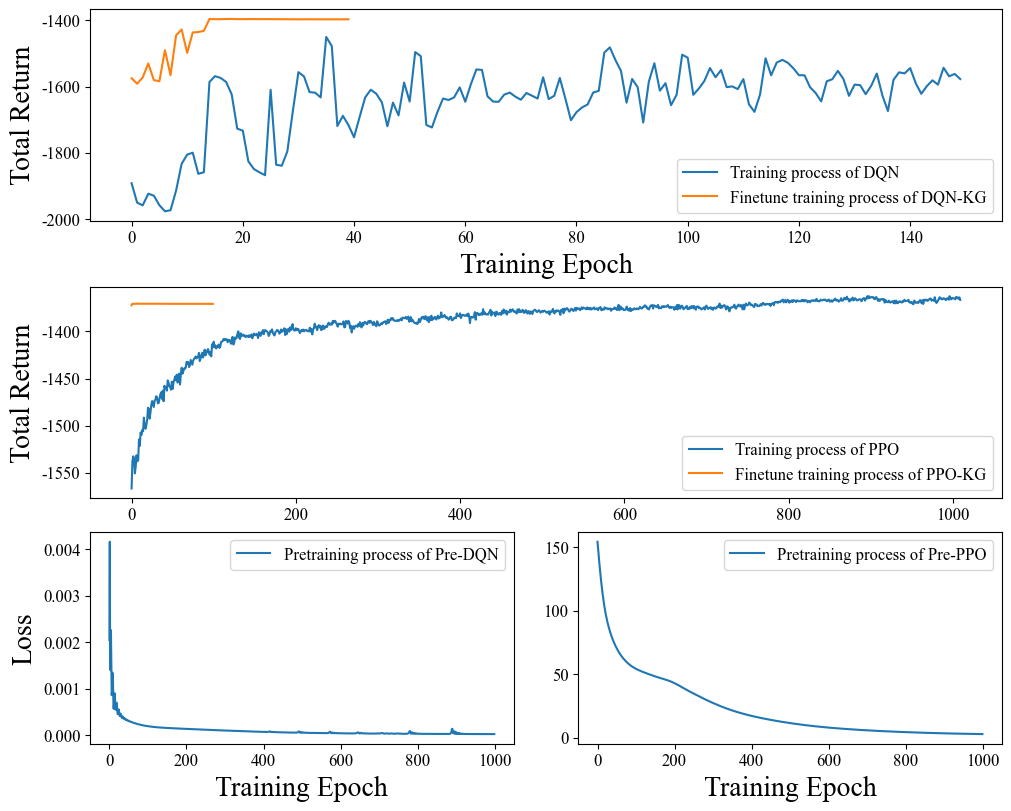

In [4]:
fig = plt.figure(dpi=100,
                 constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                 figsize=(10,8)
                )
gs = GridSpec(3, 2, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

ax1 = fig.add_subplot(gs[0, :])
ax1.plot(train_rewards['DQN'][:150],label='Training process of DQN')
#ax1.plot(train_rewards['DQN (without safety constraint)'][:150],label='Training process of DQN (without manual experience)')
ax1.plot(train_rewards['DQN-KG'][1:41],label='Finetune training process of DQN-KG')
ax1.legend()
ax1.set_ylabel('Total Return',fontsize=20)
ax1.set_xlabel('Training Epoch',fontsize=20)

ax2 = fig.add_subplot(gs[1, :])
ax2.plot(train_rewards['PPO'][:],label='Training process of PPO')
#ax2.plot(train_rewards['PPO (without safety constraint)'][:],label='Training process of PPO (without manual experience)')
ax2.plot(train_rewards['PPO-KG'][:100],label='Finetune training process of PPO-KG')
ax2.legend()
ax2.set_ylabel('Total Return',fontsize=20)
#ax2.set_xlabel('Training Epoch',fontsize=20)

ax3 = fig.add_subplot(gs[2, 0])
ax3.plot(train_rewards['DQN-pre']['Loss'][:1000],label='Pretraining process of Pre-DQN')
ax3.legend()
ax3.set_ylabel('Loss',fontsize=20)
ax3.set_xlabel('Training Epoch',fontsize=20)

ax4 = fig.add_subplot(gs[2, 1])
ax4.plot(train_rewards['PPO-pre']['Loss'][:1000],label='Pretraining process of Pre-PPO')
ax4.legend()
ax4.set_xlabel('Training Epoch',fontsize=20)

plt.savefig('./DRL_train.png',dpi=200,bbox_inches='tight')

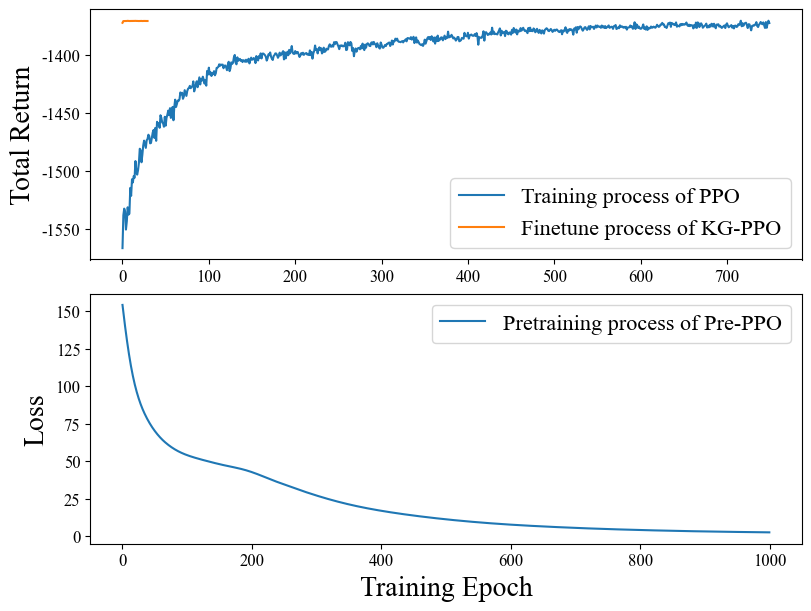

In [11]:
fig = plt.figure(dpi=100,
                 constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                 figsize=(8,6)
                )
gs = GridSpec(2, 1, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

ax2 = fig.add_subplot(gs[0])
ax2.plot(train_rewards['PPO'][:750],label='Training process of PPO')
ax2.plot(train_rewards['PPO-KG'][:30],label='Finetune process of KG-PPO')
ax2.legend(fontsize=16)
ax2.set_ylabel('Total Return',fontsize=20)
#ax2.set_xlabel('Training Epoch',fontsize=20)

ax4 = fig.add_subplot(gs[1])
ax4.plot(train_rewards['PPO-pre']['Loss'][:1000],label='Pretraining process of Pre-PPO')
ax4.legend(fontsize=16)
ax4.set_ylabel('Loss',fontsize=20)
ax4.set_xlabel('Training Epoch',fontsize=20)

plt.savefig('./PPO_train.png',dpi=200,bbox_inches='tight')

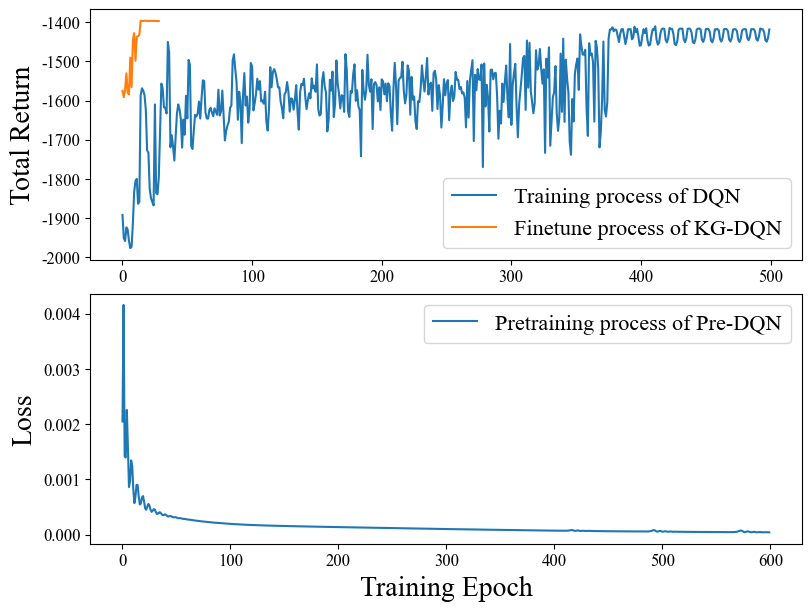

In [12]:
fig = plt.figure(dpi=100,
                 constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                 figsize=(8,6)
                )
gs = GridSpec(2, 1, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

ax2 = fig.add_subplot(gs[0])
ax2.plot(train_rewards['DQN'][:500],label='Training process of DQN')
ax2.plot(train_rewards['DQN-KG'][1:30],label='Finetune process of KG-DQN')
ax2.legend(fontsize=16)
ax2.set_ylabel('Total Return',fontsize=20)
#ax2.set_xlabel('Training Epoch',fontsize=20)

ax4 = fig.add_subplot(gs[1])
ax4.plot(train_rewards['DQN-pre']['Loss'][:600],label='Pretraining process of Pre-DQN')
ax4.legend(fontsize=16)
ax4.set_ylabel('Loss',fontsize=20)
ax4.set_xlabel('Training Epoch',fontsize=20)

plt.savefig('./DQN_train.png',dpi=200,bbox_inches='tight')

# Nosafe DQN

# Time

In [11]:
times = {}
times['DQN'] = np.load('./step3-DRL full/Results_DQN_reward3/time.npy',allow_pickle=True).tolist()
times['PPO'] = np.load('./step3-DRL full/Results_PPO_reward3/time.npy',allow_pickle=True).tolist()
times['Pre-DQN'] = np.load('./step1-DRL pretrain/Results_DQN_reward3/time.npy',allow_pickle=True).tolist()
times['Pre-PPO'] = np.load('./step1-DRL pretrain/Results_PPO_reward3/time.npy',allow_pickle=True).tolist()
times['KG-DQN'] = np.load('./step2-DRL finetune/Results_DQN_reward3/time.npy',allow_pickle=True).tolist()
times['KG-PPO'] = np.load('./step2-DRL finetune/Results_PPO_reward3/time.npy',allow_pickle=True).tolist()
times['KG-DQN'].append(0)
times['KG-PPO'].append(0)

In [13]:
pd.DataFrame(times).to_csv('table_time.csv')